In [48]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import time
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv('groceries - groceries.csv')
df

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,17,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,1,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,10,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,4,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
basket_sets = pd.get_dummies(df.drop(columns=['Item(s)'], axis=1), prefix="item")
basket_sets = basket_sets.groupby(level=0, axis=1).sum()
basket_sets

,item_Instant food products,item_UHT-milk,item_abrasive cleaner,item_artif. sweetener,item_baby cosmetics,item_baby food,item_bags,item_baking powder,item_bathroom cleaner,item_beef,...,item_turkey,item_vinegar,item_waffles,item_whipped/sour cream,item_whisky,item_white bread,item_white wine,item_whole milk,item_yogurt,item_zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
basket_sets_625 = basket_sets[0:625]
basket_sets_1250 = basket_sets[0:1250]
basket_sets_2500 = basket_sets[0:2500]
basket_sets_5000 = basket_sets[0:5000]

In [52]:
start = time.perf_counter()
frequent_itemsets = apriori(basket_sets_625, min_support=0.005, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
end = time.perf_counter()
t_1=end-start
print(t_1)

0.16771670000025551


In [53]:
start = time.perf_counter()
frequent_itemsets = apriori(basket_sets_1250, min_support=0.005, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
end = time.perf_counter()
t_2=end-start
print(t_2)

0.47025799999983064


In [54]:
start = time.perf_counter()
frequent_itemsets = apriori(basket_sets_2500, min_support=0.005, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
end = time.perf_counter()
t_3=end-start
print(t_3)

0.5534071000001859


In [55]:
start = time.perf_counter()
frequent_itemsets = apriori(basket_sets_5000, min_support=0.005, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
end = time.perf_counter()
t_4=end-start
print(t_4)

1.0848355000002812


In [56]:
start = time.perf_counter()
frequent_itemsets = apriori(basket_sets, min_support=0.005, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
end = time.perf_counter()
t_5=end-start
print(t_5)

1.6493937999998707


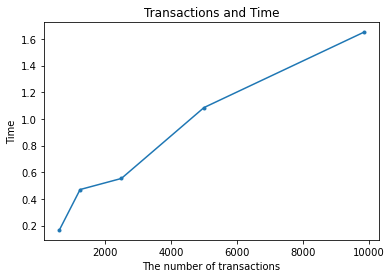

In [57]:
Transactions = [625,1250,2500,5000,9835]
# Times = [0.056,0.1385,0.1778,0.3978,0.6244]
Times = [t_1,t_2,t_3,t_4,t_5]
plt.plot(Transactions, Times, marker='o', markersize=3)
plt.title('Transactions and Time')
plt.xlabel('The number of transactions')
plt.ylabel('Time')
plt.show()

In [58]:
names = list(basket_sets.columns)
basket_sets_11 = basket_sets[names[0:11]]
basket_sets_22 = basket_sets[names[0:22]]
basket_sets_44 = basket_sets[names[0:44]]
basket_sets_88 = basket_sets[names[0:88]]

In [59]:
start = time.perf_counter()
frequent_itemsets = apriori(basket_sets_11, min_support=0.005, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
end = time.perf_counter()
u_1=end-start
print(u_1)

0.013839199999893026


In [60]:
start = time.perf_counter()
frequent_itemsets = apriori(basket_sets_22, min_support=0.005, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
end = time.perf_counter()
u_2=end-start
print(u_2)

0.029948700000204553


In [61]:
start = time.perf_counter()
frequent_itemsets = apriori(basket_sets_44, min_support=0.005, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
end = time.perf_counter()
u_3=end-start
print(u_3)

0.07760479999978998


In [62]:
start = time.perf_counter()
frequent_itemsets = apriori(basket_sets_88, min_support=0.005, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
end = time.perf_counter()
u_4=end-start
print(u_4)

0.24599269999998796


In [63]:
start = time.perf_counter()
frequent_itemsets = apriori(basket_sets, min_support=0.005, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
end = time.perf_counter()
u_5=end-start
print(u_5)

1.711573000000044


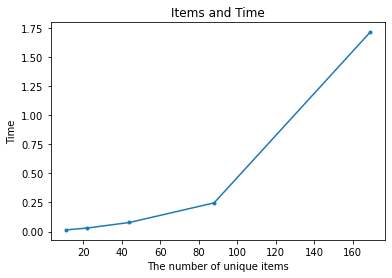

In [64]:
Items = [11,22,44,88,169]
# Times = [0.0098,0.0139,0.0272,0.0797,0.6265]
Times = [u_1,u_2,u_3,u_4,u_5]
plt.plot(Items, Times, marker='o', markersize=3)
plt.title('Items and Time')
plt.xlabel('The number of unique items')
plt.ylabel('Time')
plt.show()

In [65]:
frequent_itemsets

,support,itemsets
0,0.008033,(item_Instant food products)
1,0.033452,(item_UHT-milk)
2,0.017692,(item_baking powder)
3,0.052466,(item_beef)
4,0.033249,(item_berries)
...,...,...
996,0.005186,"(item_whole milk, item_root vegetables, item_w..."
997,0.007829,"(item_root vegetables, item_yogurt, item_whole..."
998,0.007626,"(item_whole milk, item_yogurt, item_tropical f..."
999,0.005592,"(item_whole milk, item_yogurt, item_whipped/so..."


In [66]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(item_UHT-milk),(item_bottled water),0.033452,0.110524,0.007321,0.218845,1.980074,0.003624,1.138668
1,(item_bottled water),(item_UHT-milk),0.110524,0.033452,0.007321,0.066237,1.980074,0.003624,1.035111
2,(item_UHT-milk),(item_other vegetables),0.033452,0.193493,0.008134,0.243161,1.256694,0.001662,1.065626
3,(item_other vegetables),(item_UHT-milk),0.193493,0.033452,0.008134,0.042039,1.256694,0.001662,1.008964
4,(item_UHT-milk),(item_rolls/buns),0.033452,0.183935,0.006406,0.191489,1.041071,0.000253,1.009344
...,...,...,...,...,...,...,...,...,...
2863,"(item_yogurt, item_tropical fruit)","(item_whole milk, item_root vegetables)",0.029283,0.048907,0.005694,0.194444,3.975803,0.004262,1.180667
2864,(item_whole milk),"(item_root vegetables, item_tropical fruit, it...",0.255516,0.008134,0.005694,0.022284,2.739554,0.003616,1.014472
2865,(item_root vegetables),"(item_whole milk, item_yogurt, item_tropical f...",0.108998,0.015150,0.005694,0.052239,3.448112,0.004043,1.039133
2866,(item_tropical fruit),"(item_whole milk, item_root vegetables, item_y...",0.104931,0.014540,0.005694,0.054264,3.732043,0.004168,1.042003


In [67]:
start = time.perf_counter()
for index, row in basket_sets_625.iterrows():
    row_list = list(row)
    n = len(row_list)
    for i in range(n):
        for j in range(n):
            k = 1
end = time.perf_counter()
bf=end-start
print(bf)

2.8091839000003347


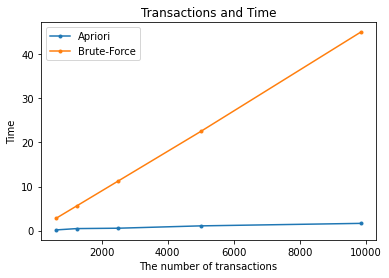

In [69]:
Transactions = [625,1250,2500,5000,9835]
Times1 = [t_1,t_2,t_3,t_4,t_5]
# Times2 = [0.718,0.718*2,0.718*4,0.718*8,0.718*16]
Times2 = [bf,bf*2,bf*4,bf*8,bf*16]
plt.plot(Transactions, Times1, marker='o', markersize=3)
plt.plot(Transactions, Times2, marker='o', markersize=3)
plt.title('Transactions and Time')
plt.xlabel('The number of transactions')
plt.ylabel('Time')
plt.legend(['Apriori','Brute-Force'])
plt.show()